In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [4]:
def read_csv_file(path):
    df = pd.read_csv(path, encoding = 'latin1', low_memory=False)
    df.drop('Unnamed: 0', axis=1, inplace = True)
    return df

In [5]:
df_sample = read_csv_file(r'dataset-mini.csv')

In [271]:
df_sample.head()

,transaction_id,is_fraud,created_at,is_subscription,transaction_type,currency_amount,currency_id,amount_scaled,merchant_customer_id,merchant_customer_email,...,is_secured,ip_country,payment_type,card_id,bank,cardbrand,cardcountry,cardtype,bin,card_exp_relative
0,4166879440771020254,0,2024-04-28 10:35:25.253682787,False,first,832.95,157,660,2a3813121eafd2e0c5d9769a850bbfc98f29296fb66bf7...,7b6ad7577459f69b090aa872f9c814d657f42fd07fcede...,...,False,UKR,#,07dd73f0839f408b08311772147e244c967ed4f11c90cf...,JSC CB Privatbank,VISA,UKR,DEBIT,96da19e3b3b916b909a2b8d8b038e5f5a734e5df5992bd...,76.0
1,13066203640708580959,0,2024-02-21 08:52:56.253682787,True,first,1350.00,157,1081,30ac4234600c1f059693dcb809f3caff4495b0dcce7cc9...,435193ad8757604861da61717fe84f2ebc12f0482be533...,...,False,ESP,#,784eaaaa47767e84f994e2123e901b5b80bf7665ee9538...,CAIXABANK S.A.,VISA,ESP,CREDIT,b3a99f3cc13e6549ff13140928861e8f86538e270f80f1...,61.0
2,18421154072732409661,0,2024-03-01 06:25:53.253682787,True,token,56700.00,141,1343,c842c2e79f15c944127a68307bbe244a0fa2cd4ca0a543...,c403e9eaf852e0b155a4b9f7ffdad1c242e6f702aa3a3e...,...,False,TUR,recurring,b1e5ef9845cc028b56ec58216dcc25eaf69212fa313f0f...,TURKIYE IS BANKASI A.S.,MASTERCARD,TUR,CREDIT,8f6ef449aba940045851a10a251d5d0fb9d1e1dac4d361...,7.0
3,17634729437251154822,0,2024-05-18 15:05:49.253682787,False,first,27000.00,159,507,#,4572961c818ea0a3a03a0783cc980d807c960200ca7646...,...,False,UKR,#,cdc4fcc8d11f303cc658b8f715d741391775e77b567e23...,JSC CB PRIVATBANK,VISA,UKR,DEBIT,734d0b205672bb054b4e622fb94eee60fce6d86295847c...,42.0
4,5213699340225781479,0,2024-04-10 20:47:45.253682787,True,first,135.00,122,100,5a31e62e36b245f4e6a707e4a314b9f09fb40626a47910...,b26f83c48d8cb3d6a34db7cf98d304d35cdeac9342fe00...,...,False,PRY,#,d5d4a363cc8b6daa20b7fe12589702a56df4bd10cd7595...,"BANCARD, S.A.",MASTERCARD,PRY,CREDIT,9ed6069def7ad1ac1b3fdb4875f3bcea1b4a84bbc7e2a9...,47.0


In [273]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545804 entries, 0 to 545803
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   transaction_id           545804 non-null  uint64 
 1   is_fraud                 545804 non-null  int64  
 2   created_at               545804 non-null  object 
 3   is_subscription          545804 non-null  bool   
 4   transaction_type         545804 non-null  object 
 5   currency_amount          545804 non-null  float64
 6   currency_id              545804 non-null  int64  
 7   amount_scaled            545804 non-null  int64  
 8   merchant_customer_id     545804 non-null  object 
 9   merchant_customer_email  545804 non-null  object 
 10  merchant_country         545804 non-null  object 
 11  merchant_language        545804 non-null  object 
 12  ip_address               545804 non-null  object 
 13  platform                 545804 non-null  object 
 14  merc

## Preprocessing the date

In [6]:
def date_restructuring(df):
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['month_creating'] = df['created_at'].dt.month
    df['week_day_creating'] = df['created_at'].dt.dayofweek
    df.drop('created_at', axis=1, inplace = True)
    return df

In [7]:
df_sample = date_restructuring(df_sample)

## Some analysis before balancing

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
full_corr = df_sample.corr(numeric_only = True)

<Axes: >

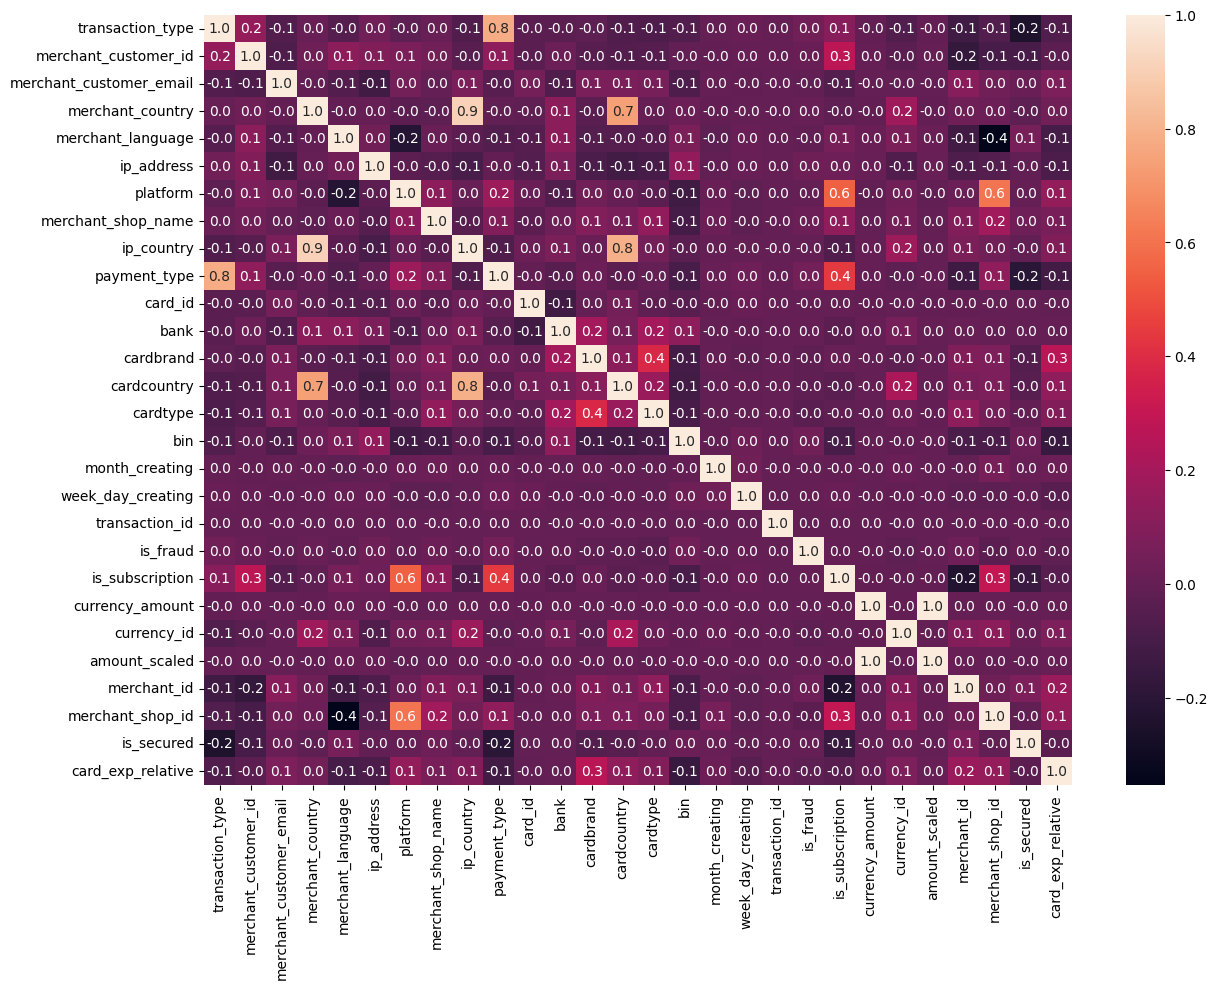

In [ ]:
plt.figure(figsize = (14, 10))
sns.heatmap(full_corr, annot = True, fmt = '.1f')

## Unbalanced categories with some visualization

In [9]:
def language_preprocessing(df):
    df['merchant_language'] = df['merchant_language'].apply(lambda lang: lang.split('_')[0].lower())
    return df

In [10]:
df_sample = language_preprocessing(df_sample)

In [11]:
unbalanced_categories = ['merchant_country', 'merchant_language', 'ip_country', 'platform', 'cardbrand', 
                         'cardcountry', 'bank']

In [12]:
def others_creating(categs, df):
    for categ in categs:
        category_counts = df[categ].value_counts(normalize = True)
        df[categ] = df[categ].apply(lambda value: value if category_counts[value] > 0.001 else 'other')
    return df

In [13]:
df_sample = others_creating(unbalanced_categories, df_sample)

## LabelEncoding

In [14]:
categ_features = df_sample.select_dtypes(include = ['object', 'bool']).columns.to_list()

In [15]:
def label_encode(df, categ_features):
    for feat in categ_features:
        encoder = LabelEncoder()
        df_sample[feat] = encoder.fit_transform(df_sample[feat])
    return df

In [16]:
df_sample = label_encode(df_sample, categ_features)

In [17]:
df_sample.head()

,transaction_id,is_fraud,is_subscription,transaction_type,currency_amount,currency_id,amount_scaled,merchant_customer_id,merchant_customer_email,merchant_country,...,payment_type,card_id,bank,cardbrand,cardcountry,cardtype,bin,card_exp_relative,month_creating,week_day_creating
0,4166879440771020254,0,0,0,832.95,157,660,70966,216730,60,...,0,12568,82,4,60,4,13028,76.0,4,6
1,13066203640708580959,0,1,0,1350.00,157,1081,81852,117753,19,...,0,192438,36,4,18,2,15525,61.0,2,2
2,18421154072732409661,0,1,2,56700.00,141,1343,336637,343902,58,...,5,284524,138,3,58,2,12411,7.0,3,4
3,17634729437251154822,0,0,0,27000.00,159,507,0,121559,60,...,0,329242,81,4,60,4,10010,42.0,5,5
4,5213699340225781479,0,1,0,135.00,122,100,151153,313181,64,...,0,342192,153,3,64,2,13730,47.0,4,2


In [18]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545804 entries, 0 to 545803
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   transaction_id           545804 non-null  uint64 
 1   is_fraud                 545804 non-null  int64  
 2   is_subscription          545804 non-null  int64  
 3   transaction_type         545804 non-null  int32  
 4   currency_amount          545804 non-null  float64
 5   currency_id              545804 non-null  int64  
 6   amount_scaled            545804 non-null  int64  
 7   merchant_customer_id     545804 non-null  int32  
 8   merchant_customer_email  545804 non-null  int32  
 9   merchant_country         545804 non-null  int32  
 10  merchant_language        545804 non-null  int32  
 11  ip_address               545804 non-null  int32  
 12  platform                 545804 non-null  int32  
 13  merchant_id              545804 non-null  uint64 
 14  merc

In [19]:
df_sample.to_csv('encoded_features_with_num.csv', index=False)